# Proyek Analisis Data: [E-Commerce Public Datase]
- **Nama:** [Farhan Abdul Mukhlis]
- **Email:** [ngebackupdoang@gmail.com]
- **ID Dicoding:** [farhanabdul12]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana hasil segmentasi kepuasan pelanggan berdasarkan ulasan terhadap e-commerce, khususnya dalam kaitannya dengan kota penjual dan rating tertinggi, waktu pemesanan, status pengiriman, serta rating terbanyak?
- Pertanyaan 2: Bagaimana distribusi kota penjual (seller_city), Kota mana yang memiliki jumlah penjualan terbanyak dan terdikit?
- Pertanyaan 3: Apa saja produk/barang yang memiliki penjualan tertinggi dan terendah?
- Pertanyaan 4: Bagaimana distribusi kota pelanggan (customer_city) dan negara bagian pelanggan (customer_state)? Wilayah mana yang memiliki jumlah pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit
!pip install contextily
!pip install geopandas
!pip install geodatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib
import seaborn
import pandas
import plotly
import streamlit
from plotly import *
from streamlit import *
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geodatasets import get_path
import numpy as np
import seaborn as sns
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [ ]:
customer_df = pd.read_csv('customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geo_df = pd.read_csv('geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_df = pd.read_csv('products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
seller_df = pd.read_csv('sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
orderitems_df = pd.read_csv('order_items_dataset.csv')
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
review_df = pd.read_csv('order_reviews_dataset.csv')
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
payment_df = pd.read_csv('order_payments_dataset.csv')
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
productctg_df = pd.read_csv('product_category_name_translation.csv')
productctg_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Mengalokasikan dataset E-commerce dalam dataframe berupa :

  1. customer_df (Segmentasi Wilayah Customer)
  2. geo_df (Segmentasi Latensi Peta Customer)
  3. orders_df (Status Orderan)
  4. product_df (Informasi Produk)
  5. seller_df (Segmentasi Wilayah Seller)
  6. orderitems_df (Harga product)
  7. review_df (Komentar dan Review Customer)
  8. payment_df (Kredit atau Pembayaran)
  9. productctg_df (Produk Translate)

### Assessing Data

#### Checking Missing Value

In [ ]:
customer_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
geo_df.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
product_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
seller_df.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
orderitems_df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
review_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
payment_df.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
productctg_df.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


#### Checking Duplicates


In [ ]:
customer_df.duplicated().sum()

np.int64(0)

In [ ]:
orders_df.duplicated().sum()

np.int64(0)

In [ ]:
product_df.duplicated().sum()

np.int64(0)

In [ ]:
seller_df.duplicated().sum()

np.int64(0)

In [ ]:
orderitems_df.duplicated().sum()

np.int64(0)

In [ ]:
payment_df.duplicated().sum()

np.int64(0)

In [ ]:
productctg_df.duplicated().sum()

np.int64(0)

**Insight:**
- Pada *orders_df* terdapat kesalahaan data berupa data null :

  -order_approved_at:	160

  -order_delivered_carrier_date:	1783

  -order_delivered_customer_date:	2965

- Pada *product_df* terdapat kesalahaan data berupa data null :

  -product_category_name:	610
  
  -product_name_lenght:	610
  
  -product_description_lenght:	610
  
  -product_photos_qty:	610
  
  -product_weight_g:	2
  
  -product_length_cm:	2
  
  -product_height_cm:	2
  
  -product_width_cm:	2

- Pada *review_df* terdapat kesalahan data berupa data null :

  -review_comment_title:	87656

  -review_comment_message:	58247

### Cleaning Data

#### Menangani Order_items

In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orderitems_df[column] = pd.to_datetime(orderitems_df[column])

orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Menangani Orders_df

*Mengubah tipe data kolom objek menjadi tipe waktu*

In [ ]:
datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date","order_estimated_delivery_date","order_approved_at", "order_purchase_timestamp"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
orders_df.dropna(axis=0, inplace=True)

In [ ]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


#### Menangani Product_df

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product_df.dropna(axis=0, inplace=True)

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [ ]:
product_df.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### Menangani review_df

In [ ]:
review_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
review_df.fillna(value="[Not include comment]", inplace=True)

In [ ]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,[Not include comment],[Not include comment],2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,[Not include comment],[Not include comment],2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,[Not include comment],[Not include comment],2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,[Not include comment],Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,[Not include comment],Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Decision terkait Penggabungan Data Customer

**Menangani Penggabungan Dataset terkait Review Customer terhadap toko seller dan pengiriman**

In [ ]:
satisfaction_df = pd.merge(
    review_df,
    orders_df,
    on='order_id',
    how='inner')
satisfaction_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,[Not include comment],[Not include comment],2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,[Not include comment],[Not include comment],2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,[Not include comment],[Not include comment],2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,[Not include comment],Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,[Not include comment],Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09


In [ ]:
satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96344 entries, 0 to 96343
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      96344 non-null  object        
 1   order_id                       96344 non-null  object        
 2   review_score                   96344 non-null  int64         
 3   review_comment_title           96344 non-null  object        
 4   review_comment_message         96344 non-null  object        
 5   review_creation_date           96344 non-null  object        
 6   review_answer_timestamp        96344 non-null  object        
 7   customer_id                    96344 non-null  object        
 8   order_status                   96344 non-null  object        
 9   order_purchase_timestamp       96344 non-null  datetime64[ns]
 10  order_approved_at              96344 non-null  datetime64[ns]
 11  order_delivered

In [ ]:
satisfaction_df = satisfaction_df.drop(columns=['review_comment_title', 'review_comment_message','review_answer_timestamp'])
satisfaction_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96344 entries, 0 to 96343
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      96344 non-null  object        
 1   order_id                       96344 non-null  object        
 2   review_score                   96344 non-null  int64         
 3   review_creation_date           96344 non-null  object        
 4   customer_id                    96344 non-null  object        
 5   order_status                   96344 non-null  object        
 6   order_purchase_timestamp       96344 non-null  datetime64[ns]
 7   order_approved_at              96344 non-null  datetime64[ns]
 8   order_delivered_carrier_date   96344 non-null  datetime64[ns]
 9   order_delivered_customer_date  96344 non-null  datetime64[ns]
 10  order_estimated_delivery_date  96344 non-null  datetime64[ns]
dtypes: datetime64[n

In [ ]:
dftes = orderitems_df.copy()

In [ ]:
satisfactiontes_df = pd.merge(
    dftes,
    satisfaction_df,
    on='order_id',
    how='inner')
satisfactiontes_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_creation_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,2018-08-15 00:00:00,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,2017-03-02 00:00:00,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [ ]:
columns_to_drop = ['order_id', 'order_item_id', 'product_id', 'price', 'freight_value', 'review_id', 'review_creation_date', 'customer_id']
satisfactiontes_df = satisfactiontes_df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
satisfactiontes_df

,seller_id,shipping_limit_date,review_score,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,5,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,4,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,5,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,4,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,5,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...
109991,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,5,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
109992,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,5,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
109993,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,5,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
109994,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,5,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


In [ ]:
satisfactiontes_df = pd.merge(
    seller_df,
    satisfactiontes_df,
    on='seller_id',
    how='inner')
satisfactiontes_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,shipping_limit_date,review_score,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-08-25 20:50:19,5,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-05-11 16:25:11,1,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-09-05 12:50:19,3,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2017-11-22 04:30:29,5,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2017-10-06 02:14:42,5,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03


In [ ]:
columns_to_drop = ['seller_id', 'seller_zip_code_prefix', 'seller_state']
satisfactiontes_df = satisfactiontes_df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
satisfactiontes_df

,seller_city,shipping_limit_date,review_score,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,campinas,2017-08-25 20:50:19,5,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01
1,campinas,2017-05-11 16:25:11,1,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30
2,campinas,2017-09-05 12:50:19,3,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20
3,mogi guacu,2017-11-22 04:30:29,5,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04
4,mogi guacu,2017-10-06 02:14:42,5,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03
...,...,...,...,...,...,...,...,...,...
109991,pelotas,2017-02-13 11:32:53,4,delivered,2017-02-07 11:32:53,2017-02-09 02:43:17,2017-02-10 07:07:57,2017-02-13 11:09:14,2017-03-10
109992,pelotas,2017-03-10 04:03:43,5,delivered,2017-03-01 02:16:01,2017-03-02 04:03:43,2017-03-03 14:01:24,2017-03-06 15:34:28,2017-03-28
109993,pelotas,2017-02-15 16:42:59,4,delivered,2017-02-09 16:42:59,2017-02-09 16:55:12,2017-02-10 07:07:56,2017-02-13 11:09:12,2017-03-10
109994,pelotas,2017-04-11 18:05:17,4,delivered,2017-04-03 17:54:02,2017-04-03 18:05:17,2017-04-05 09:53:19,2017-04-10 16:37:06,2017-05-03


In [ ]:
satisfactiontes_df['delivery_status'] = np.where(satisfactiontes_df['order_delivered_carrier_date'] > satisfactiontes_df['shipping_limit_date'], 'Late', 'On Time')


In [ ]:
satisfactiontes_df

,seller_city,shipping_limit_date,review_score,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
0,campinas,2017-08-25 20:50:19,5,delivered,2017-08-21 20:35:44,2017-08-21 20:50:19,2017-08-29 20:33:29,2017-08-30 16:07:13,2017-09-01,Late
1,campinas,2017-05-11 16:25:11,1,delivered,2017-05-05 16:12:29,2017-05-05 16:25:11,2017-05-12 05:43:55,2017-06-02 16:57:44,2017-05-30,Late
2,campinas,2017-09-05 12:50:19,3,delivered,2017-08-30 11:47:52,2017-08-30 12:50:19,2017-08-30 19:22:18,2017-09-01 16:51:26,2017-09-20,On Time
3,mogi guacu,2017-11-22 04:30:29,5,delivered,2017-11-10 16:54:13,2017-11-14 04:31:07,2017-11-14 20:06:59,2017-11-21 23:26:35,2017-12-04,On Time
4,mogi guacu,2017-10-06 02:14:42,5,delivered,2017-09-28 19:31:57,2017-09-30 02:14:42,2017-10-02 19:33:19,2017-10-06 17:03:59,2017-11-03,On Time
...,...,...,...,...,...,...,...,...,...,...
109991,pelotas,2017-02-13 11:32:53,4,delivered,2017-02-07 11:32:53,2017-02-09 02:43:17,2017-02-10 07:07:57,2017-02-13 11:09:14,2017-03-10,On Time
109992,pelotas,2017-03-10 04:03:43,5,delivered,2017-03-01 02:16:01,2017-03-02 04:03:43,2017-03-03 14:01:24,2017-03-06 15:34:28,2017-03-28,On Time
109993,pelotas,2017-02-15 16:42:59,4,delivered,2017-02-09 16:42:59,2017-02-09 16:55:12,2017-02-10 07:07:56,2017-02-13 11:09:12,2017-03-10,On Time
109994,pelotas,2017-04-11 18:05:17,4,delivered,2017-04-03 17:54:02,2017-04-03 18:05:17,2017-04-05 09:53:19,2017-04-10 16:37:06,2017-05-03,On Time


In [ ]:

satisfactiontes_df['time_deliver_tocarrier'] = (satisfactiontes_df['order_delivered_carrier_date'] - satisfactiontes_df['order_approved_at']).dt.days

satisfactiontes_df.loc[satisfactiontes_df['time_deliver_tocarrier'] < 1, 'time_deliver_tocarrier'] = (satisfactiontes_df['order_delivered_carrier_date'] - satisfactiontes_df['order_approved_at']).dt.total_seconds() / 3600 / 24


<ipython-input-54-c226f18d8e60>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.27221065 0.64990741 0.92946759 ... 0.94960648 0.94960648 0.59217593]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



**Delete Data with issue Time_Deliver minus due to Human error**

In [ ]:
satisfactiontes_df = satisfactiontes_df[satisfactiontes_df['time_deliver_tocarrier'] >= 0]

In [ ]:
columns_to_delete = ['shipping_limit_date', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date','order_approved_at']
satisfactiontes_df = satisfactiontes_df.drop(columns=columns_to_delete, errors='ignore')
satisfactiontes_df


,seller_city,review_score,order_status,delivery_status,time_deliver_tocarrier
0,campinas,5,delivered,Late,7.000000
1,campinas,1,delivered,Late,6.000000
2,campinas,3,delivered,On Time,0.272211
3,mogi guacu,5,delivered,On Time,0.649907
4,mogi guacu,5,delivered,On Time,2.000000
...,...,...,...,...,...
109991,pelotas,4,delivered,On Time,1.000000
109992,pelotas,5,delivered,On Time,1.000000
109993,pelotas,4,delivered,On Time,0.592176
109994,pelotas,4,delivered,On Time,1.000000


In [ ]:
satisfaction_df = satisfactiontes_df.copy()

In [ ]:
satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108460 entries, 0 to 109995
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_city             108460 non-null  object 
 1   review_score            108460 non-null  int64  
 2   order_status            108460 non-null  object 
 3   delivery_status         108460 non-null  object 
 4   time_deliver_tocarrier  108460 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.0+ MB


**Menangani Penggabungan Dataset terkait Segmentasi Customer berdasarkan pembelian**

In [ ]:
infoproduct_df = pd.merge(
    product_df,
    productctg_df,
    on='product_category_name',
    how='inner')
infoproduct_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
infoproduct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32327 entries, 0 to 32326
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32327 non-null  object 
 1   product_category_name          32327 non-null  object 
 2   product_name_lenght            32327 non-null  float64
 3   product_description_lenght     32327 non-null  float64
 4   product_photos_qty             32327 non-null  float64
 5   product_weight_g               32327 non-null  float64
 6   product_length_cm              32327 non-null  float64
 7   product_height_cm              32327 non-null  float64
 8   product_width_cm               32327 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [ ]:
columns_to_delete = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','product_category_name']
infoproduct_df = infoproduct_df.drop(columns=columns_to_delete)
infoproduct_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32327 entries, 0 to 32326
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32327 non-null  object
 1   product_category_name_english  32327 non-null  object
dtypes: object(2)
memory usage: 505.2+ KB


In [ ]:
ordered_df = pd.merge(
    infoproduct_df,
    orderitems_df,
    on='product_id',
    how='inner')
ordered_df.head()

,product_id,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [ ]:
ordered_df = pd.merge(
    payment_df,
    ordered_df,
    on='order_id',
    how='inner')
ordered_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,af74cc53dcffc8384b29e7abfa41902b,home_construction,1,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,a630cc320a8c872f9de830cf121661a3,auto,1,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,2028bf1b01cafb2d2b1901fca4083222,perfumery,1,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,548e5bfe28edceab6b51fa707cc9556f,bed_bath_table,1,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,386486367c1f9d4f587a8864ccb6902b,bed_bath_table,1,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88


In [ ]:
seller_edit = seller_df.drop(columns=['seller_zip_code_prefix','seller_state'])

In [ ]:
ordered_dftes = pd.merge(
    seller_edit,
    ordered_df,
    on='seller_id',
    how='inner')
ordered_dftes.head()

,seller_id,seller_city,order_id,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category_name_english,order_item_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,campinas,bc8a5de6abf5b14f98a6135a7fb46731,1,credit_card,4,158.80,325a06bcce0da45b7f4ecf2797dd40e4,sports_leisure,2,2017-09-05 12:50:19,10.8,2.42
1,3442f8959a84dea7ee197c632cb2df15,campinas,6d953888a914b67350d5bc4d48f2acab,1,credit_card,2,117.62,f4621f8ad6f54a2e3c408884068be46d,sports_leisure,1,2017-05-11 16:25:11,101.7,15.92
2,3442f8959a84dea7ee197c632cb2df15,campinas,4a90af3e85dd563884e2afeab1091394,1,credit_card,2,115.76,ffb64e34a37740dafb6c88f1abd1fa61,sports_leisure,1,2017-08-25 20:50:19,106.2,9.56
3,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,83f24bbc4f76a2730ba9c9cfa32e6d07,1,credit_card,3,231.45,765c417cdc38443aaa558a0159a98591,luggage_accessories,1,2017-05-05 09:25:08,209.9,21.55
4,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,4436eb8a73f08dc5c4ba8b1e5b96d290,1,credit_card,1,383.99,51b10a13b460cebc64e1325e7f228ae8,luggage_accessories,1,2017-08-24 02:12:13,369.9,14.09


In [ ]:
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
order_edit = pd.merge(
    customer_df,
    orders_df,
    on='customer_id',
    how='inner')
order_edit.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [ ]:
order_finale = order_edit[['customer_id', 'customer_city', 'customer_state', 'order_id','order_approved_at']]


In [ ]:
order_finale

,customer_id,customer_city,customer_state,order_id,order_approved_at
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09
...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45
96457,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12
96458,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03
96459,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20


In [ ]:
customer_edit = customer_df.drop(columns=['customer_zip_code_prefix','customer_state'])

In [ ]:
ordered_dftes = pd.merge(
    order_finale,
    ordered_dftes,
    on='order_id',
    how='inner')
ordered_dftes.head()

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_id,seller_city,payment_sequential,payment_type,payment_installments,payment_value,product_id,product_category_name_english,order_item_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,1,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,1,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,b8bc237ba3788b23da09c0f1f3a3288c,itajai,1,credit_card,8,335.48,4aa6014eceb682077f9dc4bffebc05b0,housewares,1,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,1,credit_card,7,157.73,bd07b66896d6f1494f5b86251848ced7,office_furniture,1,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,1,credit_card,1,173.30,a5647c44af977b148e0a3a4751a09e2e,office_furniture,1,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,4a3ca9315b744ce9f8e9374361493884,ibitinga,1,credit_card,8,252.25,9391a573abe00141c56e38d84d7d5b3b,home_confort,1,2018-07-31 10:10:09,230.00,22.25


In [ ]:
columns_to_drop = ['seller_id', 'product_id', 'shipping_limit_date']
ordered_dftes = ordered_dftes.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
ordered_dftes

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_city,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,order_item_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,itaquaquecetuba,1,credit_card,2,146.87,office_furniture,1,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,itajai,1,credit_card,8,335.48,housewares,1,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,itaquaquecetuba,1,credit_card,7,157.73,office_furniture,1,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,itaquaquecetuba,1,credit_card,1,173.30,office_furniture,1,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,ibitinga,1,credit_card,8,252.25,home_confort,1,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113362,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 16:08:45,garca,1,credit_card,6,88.78,books_general_interest,1,74.90,13.88
113363,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:35:12,araraquara,1,credit_card,3,129.06,sports_leisure,1,114.90,14.16
113364,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:30:03,sao paulo,1,credit_card,5,56.04,health_beauty,1,37.00,19.04
113365,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:31:20,guariba,1,credit_card,2,711.07,watches_gifts,1,689.00,22.07


In [ ]:
ordered_dftes = ordered_dftes.rename(columns={'product_category_name_english': 'name_product'})
ordered_dftes.head()

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_city,payment_sequential,payment_type,payment_installments,payment_value,name_product,order_item_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,itaquaquecetuba,1,credit_card,2,146.87,office_furniture,1,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,itajai,1,credit_card,8,335.48,housewares,1,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,itaquaquecetuba,1,credit_card,7,157.73,office_furniture,1,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,itaquaquecetuba,1,credit_card,1,173.30,office_furniture,1,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,ibitinga,1,credit_card,8,252.25,home_confort,1,230.00,22.25


In [ ]:
ordered_df = ordered_dftes.copy()
ordered_df.head()

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_city,payment_sequential,payment_type,payment_installments,payment_value,name_product,order_item_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,itaquaquecetuba,1,credit_card,2,146.87,office_furniture,1,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,itajai,1,credit_card,8,335.48,housewares,1,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,itaquaquecetuba,1,credit_card,7,157.73,office_furniture,1,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,itaquaquecetuba,1,credit_card,1,173.30,office_furniture,1,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,ibitinga,1,credit_card,8,252.25,home_confort,1,230.00,22.25


####**Insight:**
- Melakukan Pembersihan berupa Interpolasi Time dan penghapusan pada data null.
- Hasil Penggabungan dataframe, disimpulkan berdasarkan Segmentasi Pelanggan dan Segmentasi Review

## Exploratory Data Analysis (EDA)

### Explore Satisfaction_df

In [ ]:
satisfaction_df.sample(5)

,seller_city,review_score,order_status,delivery_status,time_deliver_tocarrier
83305,brasilia,3,delivered,On Time,0.178102
94507,guariba,5,delivered,On Time,0.912882
102832,curitiba,4,delivered,On Time,0.699803
65404,piracicaba,4,delivered,On Time,0.853947
84679,campo limpo paulista,4,delivered,On Time,3.000000


In [ ]:
satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108460 entries, 0 to 109995
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_city             108460 non-null  object 
 1   review_score            108460 non-null  int64  
 2   order_status            108460 non-null  object 
 3   delivery_status         108460 non-null  object 
 4   time_deliver_tocarrier  108460 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.0+ MB


In [ ]:
satisfaction_df.describe(include="all")

,seller_city,review_score,order_status,delivery_status,time_deliver_tocarrier
count,108460,108460.000000,108460,108460,108460.000000
unique,593,NaN,2,2,NaN
top,sao paulo,NaN,delivered,On Time,NaN
freq,26812,NaN,108453,98255,NaN
mean,NaN,4.079190,NaN,NaN,2.570343
std,NaN,1.348976,NaN,NaN,3.415427
min,NaN,1.000000,NaN,NaN,0.000174
25%,NaN,4.000000,NaN,NaN,0.908067
50%,NaN,5.000000,NaN,NaN,1.000000
75%,NaN,5.000000,NaN,NaN,3.000000


In [ ]:
satisfaction_df.groupby(by="delivery_status").agg({
    "time_deliver_tocarrier": ["max", "min", "mean", "median"],

})

time_deliver_tocarrier                           
                                   max       min      mean median
delivery_status                                                  
Late                             125.0  0.024375  8.872704    7.0
On Time                           49.0  0.000174  1.915765    1.0

In [ ]:
satisfaction_df.groupby(by="review_score").agg({
    "time_deliver_tocarrier": ["max", "min", "mean", "median"],

})

time_deliver_tocarrier                           
                                max       min      mean median
review_score                                                  
1                             101.0  0.001759  3.861073    2.0
2                              47.0  0.000949  3.220024    2.0
3                              45.0  0.002639  2.871115    2.0
4                             125.0  0.000174  2.553456    1.0
5                              55.0  0.000428  2.236351    1.0

In [ ]:
satisfaction_df.groupby(by="seller_city").agg({
    "review_score": ["max", "min", "mean", "median"],

}).sort_values(by=("review_score", "mean"), ascending=False)

review_score                
                                   max min mean median
seller_city                                           
uruguaiana                           5   5  5.0    5.0
triunfo                              5   5  5.0    5.0
araquari                             5   5  5.0    5.0
serra redonda                        5   5  5.0    5.0
são paulo                           5   5  5.0    5.0
...                                ...  ..  ...    ...
santo antonio da patrulha            1   1  1.0    1.0
soledade                             1   1  1.0    1.0
cravinhos                            1   1  1.0    1.0
cordilheira alta                     1   1  1.0    1.0
aguas claras df                      1   1  1.0    1.0

[593 rows x 4 columns]

In [ ]:
satisfaction_df.groupby(by="delivery_status").review_score.value_counts()

delivery_status  review_score
Late             5                4674
                 1                2122
                 4                1839
                 3                1047
                 2                 523
On Time          5               57678
                 4               19033
                 1               10317
                 3                8101
                 2                3126
Name: count, dtype: int64

In [ ]:
satisfaction_df.groupby(by="order_status").review_score.value_counts()

order_status  review_score
canceled      1                   4
              5                   2
              3                   1
delivered     5               62350
              4               20872
              1               12435
              3                9147
              2                3649
Name: count, dtype: int64

In [ ]:
top_10_cities = satisfaction_df.groupby(by="seller_city").review_score.value_counts().sort_values(ascending=False).head(10)
top_10_cities


seller_city            review_score
sao paulo              5               15304
                       4                5210
ibitinga               5                3733
sao paulo              1                3095
                       3                2232
curitiba               5                1904
santo andre            5                1751
belo horizonte         5                1499
ibitinga               4                1450
sao jose do rio preto  5                1443
Name: count, dtype: int64

In [ ]:
top_10_cities = satisfaction_df.groupby(by="seller_city")['delivery_status'].value_counts().sort_values(ascending=False).head(10)
top_10_cities


,,count
seller_city,delivery_status,
sao paulo,On Time,24425
ibitinga,On Time,6960
santo andre,On Time,2784
curitiba,On Time,2664
sao paulo,Late,2387
belo horizonte,On Time,2290
sao jose do rio preto,On Time,2252
rio de janeiro,On Time,2136
guarulhos,On Time,2068


In [ ]:
top_10_cities = satisfaction_df.groupby(by="seller_city")['time_deliver_tocarrier'].mean().sort_values(ascending=True).head(10)
top_10_cities


,time_deliver_tocarrier
seller_city,
sao sebastiao da grama/sp,0.106134
bom jardim,0.172384
juzeiro do norte,0.312361
santa cecilia,0.336725
araquari,0.345787
passos,0.397049
jarinu,0.399271
ferraz de vasconcelos,0.402118
rio de janeiro / rio de janeiro,0.408592


### Explore Ordered_df

In [ ]:
ordered_df.sample(5)

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_city,payment_sequential,payment_type,payment_installments,payment_value,name_product,order_item_id,price,freight_value
81847,8abfeeb7b843cfbc0f5844addf3a4880,hortolandia,SP,952da942e2586c7131de1381aba049a3,2017-10-31 18:31:10,itaquaquecetuba,1,credit_card,10,228.67,office_furniture,1,196.99,31.68
64824,92af42b44706727c163d09e7b0d8a76c,sao luis,MA,5a4ae77af140c48f0cd65b631bdcb342,2017-08-05 15:10:13,rio do sul,1,credit_card,10,107.48,sports_leisure,1,65.00,42.48
74117,4d25fb9f5e7979383338f6c96ef28de0,monte aprazivel,SP,eed5f84919d668737e50dac75a4ebbd4,2018-04-26 08:50:07,canoas,1,credit_card,3,195.48,toys,1,120.90,74.58
30135,e02cd9861f07833a0aa0e073527e81a8,mato rico,PR,9a0b6a2c842e5a42bef91fa4c7dea9c4,2017-09-21 09:04:42,borda da mata,1,credit_card,4,92.65,luggage_accessories,1,72.90,19.75
36235,728e136fca2819b62d610743ae2904b8,goianesia do para,PA,fb5d8b462dc9570527eff204b8a1a57b,2017-04-24 13:50:18,sao paulo,1,credit_card,10,297.14,computers_accessories,1,269.00,28.14


In [ ]:
ordered_df.describe(include="all")

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_city,payment_sequential,payment_type,payment_installments,payment_value,name_product,order_item_id,price,freight_value
count,113367,113367,113367,113367,113367,113367,113367.000000,113367,113367.000000,113367.000000,113367,113367.000000,113367.000000,113367.000000
unique,95109,4073,27,95109,NaN,588,NaN,4,NaN,NaN,71,NaN,NaN,NaN
top,270c23a11d024a44c896d1894b261a83,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,NaN,sao paulo,NaN,credit_card,NaN,NaN,bed_bath_table,NaN,NaN,NaN
freq,63,17867,47819,63,NaN,28290,NaN,83695,NaN,NaN,11649,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2018-01-02 00:28:11.964680704,NaN,1.089947,NaN,2.942532,172.222013,NaN,1.196856,120.161067,20.024231
min,NaN,NaN,NaN,NaN,2016-10-04 09:43:32,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,0.850000,0.000000
25%,NaN,NaN,NaN,NaN,2017-09-14 03:04:54.500000,NaN,1.000000,NaN,1.000000,61.000000,NaN,1.000000,39.900000,13.080000
50%,NaN,NaN,NaN,NaN,2018-01-20 22:41:09,NaN,1.000000,NaN,2.000000,108.140000,NaN,1.000000,74.900000,16.320000
75%,NaN,NaN,NaN,NaN,2018-05-06 08:36:52.500000,NaN,1.000000,NaN,4.000000,189.370000,NaN,1.000000,133.700000,21.200000
max,NaN,NaN,NaN,NaN,2018-08-29 15:10:26,NaN,26.000000,NaN,24.000000,13664.080000,NaN,21.000000,6735.000000,409.680000


In [ ]:
ordered_df.groupby(by="payment_type").agg({
    "customer_city": ["nunique"],
    "customer_state": ["nunique"],
    "name_product": ["nunique"],
    "price": ["max", "min", "mean", "median"],

}).sort_values(by=("price", "mean"), ascending=False)

customer_city customer_state name_product   price        \
                   nunique        nunique      nunique     max   min   
payment_type                                                           
credit_card           3698             27           71  6735.0  0.85   
debit_card             427             25           56  4059.0  5.99   
boleto                2394             27           71  6729.0  0.85   
voucher                848             26           65  3124.0  2.20   

                                 
                    mean median  
payment_type                     
credit_card   125.862666  79.00  
debit_card    107.656157  59.99  
boleto        104.096274  65.00  
voucher       103.049624  60.00

In [ ]:
ordered_df.groupby(by="payment_type").agg({
    "order_item_id": ["max", "min", "mean", "median"],
    "payment_value": ["max", "min", "mean", "median"],
    "payment_installments": ["max", "min", "mean", "median"],
    "payment_sequential": ["max", "min", "mean", "median"],
}).sort_values(by=("payment_value", "mean"), ascending=False)

order_item_id                      payment_value         \
                       max min      mean median           max    min   
payment_type                                                           
credit_card             21   1  1.187514    1.0      13664.08   0.01   
boleto                  20   1  1.251770    1.0       7274.88  11.62   
debit_card               7   1  1.158544    1.0       4445.50  13.38   
voucher                  7   1  1.135917    1.0       1839.05   0.00   

                                 payment_installments                       \
                    mean  median                  max min      mean median   
payment_type                                                                 
credit_card   179.317710  115.26                   24   0  3.631209    3.0   
boleto        176.284462  105.37                    1   1  1.000000    1.0   
debit_card    149.292461   97.52                    1   1  1.000000    1.0   
voucher        64.712114   40.33                    1   1  1.000000    1.0   

             payment_sequential                       
                            max min      mean median  
payment_type                                          
credit_card                   3   1  1.004313    1.0  
boleto                        2   1  1.000045    1.0  
debit_card                    3   1  1.032696    1.0  
voucher                      26   1  2.627350    2.0

In [ ]:
ordered_df.groupby(by="name_product").agg({
    "price": ["max", "min", "mean", "median"],
    "order_item_id": ["max", "min", "mean", "median"],
    "payment_value": ["max", "min", "mean", "median"],
    "payment_installments": ["max", "min", "mean", "median"],
    "payment_sequential": ["max", "min", "mean", "median"],
}).sort_values(by=("price", "mean"), ascending=False)

price                               \
                                           max    min         mean   median   
name_product                                                                  
computers                              6729.00  34.50  1104.317685  1100.00   
small_appliances_home_oven_and_coffee  2899.00  10.19   641.194133   750.00   
home_appliances_2                      2350.00  13.90   451.729962   229.90   
agro_industry_and_commerce             2990.00  12.99   332.835691   268.45   
musical_instruments                    4399.87   4.90   296.108561    95.45   
...                                        ...    ...          ...      ...   
food                                    274.99   9.99    57.198408    48.89   
cds_dvds_musicals                        65.00  45.00    52.142857    45.00   
diapers_and_hygiene                     139.89  25.00    40.561892    37.00   
flowers                                  65.90  15.60    33.637576    25.99   
home_comfort_2                          219.99  12.90    24.940968    12.90   

                                      order_item_id                       \
                                                max min      mean median   
name_product                                                               
computers                                         4   1  1.152778    1.0   
small_appliances_home_oven_and_coffee             2   1  1.013333    1.0   
home_appliances_2                                 2   1  1.019157    1.0   
agro_industry_and_commerce                        6   1  1.256098    1.0   
musical_instruments                               4   1  1.082849    1.0   
...                                             ...  ..       ...    ...   
food                                              6   1  1.186408    1.0   
cds_dvds_musicals                                 2   1  1.142857    1.0   
diapers_and_hygiene                               5   1  1.729730    1.0   
flowers                                           2   1  1.121212    1.0   
home_comfort_2                                    3   1  1.290323    1.0   

                                      payment_value                      \
                                                max    min         mean   
name_product                                                              
computers                                   6922.21  50.00  1271.629074   
small_appliances_home_oven_and_coffee       2960.05  18.06   670.422000   
home_appliances_2                           2455.12   5.56   455.379540   
agro_industry_and_commerce                  6081.54   2.35   470.049756   
musical_instruments                         4513.32   4.68   321.392674   
...                                             ...    ...          ...   
food                                         437.59   2.09    88.039709   
cds_dvds_musicals                            122.22  54.94    85.673571   
diapers_and_hygiene                          193.55  37.39   111.518108   
flowers                                      227.63  30.29    67.060909   
home_comfort_2                               237.68  10.71    55.178710   

                                               payment_installments      \
                                        median                  max min   
name_product                                                              
computers                              1240.85                   20   1   
small_appliances_home_oven_and_coffee   673.47                   12   1   
home_appliances_2                       257.30                   15   1   
agro_industry_and_commerce              223.27                   10   1   
musical_instruments                     138.72                   20   1   
...                                        ...                  ...  ..   
food                                     73.13                   12   1   
cds_dvds_musicals                        74.94                    7 

In [ ]:
ordered_df.customer_id.is_unique

False

In [ ]:
ordered_df.groupby(by="customer_city").agg({
    "price": ["max", "min", "mean", "median"],
    "order_item_id": ["max", "min", "mean", "median"],
    "payment_value": ["max", "min", "mean", "median"],
    "payment_installments": ["max", "min", "mean", "median"],
    "payment_sequential": ["max", "min", "mean", "median"],
}).sort_values(by=("payment_value", "max"), ascending=False)

price                           order_item_id  \
                                  max    min        mean median           max   
customer_city                                                                   
rio de janeiro                3930.00   5.30  125.537775  79.80            10   
vila velha                    1790.00   9.99  127.466913  69.90             4   
campo grande                  6735.00   6.10  156.677044  79.90             4   
vitoria                       6729.00   6.90  122.496995  69.90             6   
marilia                       6499.00  12.99  166.217212  75.00             4   
...                               ...    ...         ...    ...           ...   
santo antonio do rio abaixo      6.00   6.00    6.000000   6.00             1   
tamboara                         8.99   8.99    8.990000   8.99             1   
jenipapo de minas                7.48   7.48    7.480000   7.48             1   
polo petroquimico de triunfo     5.60   5.60    5.600000   5.60             1   
sabaudia                         5.90   5.90    5.900000   5.90             1   

                                                  payment_value         \
                             min      mean median           max    min   
customer_city                                                            
rio de janeiro                 1  1.202276    1.0      13664.08   0.00   
vila velha                     1  1.118734    1.0       7274.88   0.65   
campo grande                   1  1.154696    1.0       6929.31   1.74   
vitoria                        1  1.154930    1.0       6922.21   3.87   
marilia                        1  1.076923    1.0       6726.66   0.77   
...                           ..       ...    ...           ...    ...   
santo antonio do rio abaixo    1  1.000000    1.0         24.23  24.23   
tamboara                       1  1.000000    1.0         24.09  24.09   
jenipapo de minas              1  1.000000    1.0         22.58  22.58   
polo petroquimico de triunfo   1  1.000000    1.0         20.70  20.70   
sabaudia                       1  1.000000    1.0         20.42  20.42   

                                                  payment_installments      \
                                    mean   median                  max min   
customer_city                                                                
rio de janeiro                192.526677  114.250                   24   1   
vila velha                    219.606649  100.340                   10   1   
campo grande                  204.962901  120.145                   12   1   
vitoria                       173.987535  107.645                   10   1   
marilia                       193.346538   95.390                   10   1   
...                                  ...      ...                  ...  ..   
santo antonio do rio abaixo    24.230000   24.230                    2   2   
tamboara                       24.090000   24.090                    1   1   
jenipapo de minas              22.580000   22.580                    2   2   
polo petroquimico de triunfo   20.700000   20.700                    1   1   
sabaudia                       20.420000   20.420                    1   1   

                                              payment_sequential      \
                                  mean median                max min   
customer_city                                                          
rio de janeiro                2.922644    2.0                 19   1   
vila velha                    2.846966    1.0                  5   1   
campo grande                  2.861878    2.0                  3   1   
vitoria                       2.758216    2.0                  2   1   
marilia                       3.072115    2.0                  3   1   
...                                ...    ...                ...  ..   
santo antonio do rio abaixo   2.000000    2.0                  1   1   
tamboara                      1.000000    1.0  

In [ ]:
ordered_df.groupby(by="customer_state").agg({
    "price": ["max", "min", "mean", "median"],
    "order_item_id": ["max", "min", "mean", "median"],
    "payment_value": ["max", "min", "mean", "median"],
    "payment_installments": ["max", "min", "mean", "median"],
    "payment_sequential": ["max", "min", "mean", "median"],
}).sort_values(by=("payment_value", "mean"), ascending=False)

price                             order_item_id      \
                    max    min        mean   median           max min   
customer_state                                                          
PB              4590.00   4.90  192.673534   99.950             6   1   
AC              1200.00  12.90  184.136522  104.445             6   1   
AP              1437.00  13.65  163.310964   99.900             5   1   
RR               949.90  13.65  154.806591  107.545             2   1   
AL              1798.00   9.00  185.529268  106.900             5   1   
PI              1780.00  12.50  163.581429   99.990             5   1   
MA              2499.75   9.00  146.652277   89.000             6   1   
MT              1890.00   6.90  144.823177   85.000             6   1   
RO              2400.00   9.99  167.005418   90.000             5   1   
PA              2199.00   6.00  159.223738   98.900             6   1   
SE              1670.00  13.65  152.081302   89.900             5   1   
CE              2690.00   7.80  154.404339   89.990             6   1   
TO              2649.99   8.50  165.453606   89.990             6   1   
GO              2170.00   3.90  124.758555   79.900            20   1   
RN              1788.00  10.00  167.651694   97.000             5   1   
AM              1688.00   8.50  132.135090   79.900             5   1   
BA              2999.89   5.20  133.095381   79.990            11   1   
PE              3700.00   5.99  140.889739   89.000             5   1   
MS              6735.00   6.10  142.620799   80.490             6   1   
SC              3109.99   3.90  124.203216   76.900            12   1   
RJ              4799.00   0.85  124.385938   79.900            10   1   
PR              2999.99   2.90  117.498998   70.935            15   1   
DF              3999.00   4.90  127.405111   79.000             6   1   
RS              3124.00   3.06  120.066807   74.990            10   1   
ES              6729.00   5.99  120.560752   77.970             6   1   
MG              4099.99   3.85  119.921537   75.900            12   1   
SP              6499.00   0.85  109.480486   69.800            21   1   

                                payment_value                              \
                    mean median           max    min        mean   median   
customer_state                                                              
PB              1.192182    1.0       4681.78   1.21  283.607964  155.090   
AC              1.250000    1.0       1251.70  11.58  269.164674  187.395   
AP              1.253012    1.0       1482.42  34.80  259.297711  169.500   
RR              1.113636    1.0        994.77  39.03  249.978636  197.050   
AL              1.096110    1.0       2269.98   1.33  246.532334  141.020   
PI              1.126374    1.0       1989.75   3.35  243.239231  153.945   
MA              1.158416    1.0       3195.73   2.27  239.056918  138.270   
MT              1.267104    1.0       3242.84   1.23  234.539297  135.920   
RO              1.156364    1.0       2452.12   3.29  233.751709  159.520   
PA              1.146729    1.0       2252.66   2.31  228.228243  148.040   
SE              1.148438    1.0       1729.98   0.39  222.581458  144.120   
CE              1.161943    1.0       2734.11   0.52  220.799595  134.765   
TO              1.160606    1.0       2784.16   1.93  212.895424  133.040   
GO              1.341095    1.0       2267.28   0.00  208.249008  117.080   
RN              1.111712    1.0       1821.82   5.43  205.986234  140.160   
AM              1.173653    1.0       1853.75   0.66  198.956407  126.940   
BA              1.167185    1.0       3358.24   0.10  197.595661  117.920   
PE              1.115363    1.0       3792.59   0.52  196.895169  134.000   
MS              1.200969    1.0       6929.31   1.74  196.092191  124.230   
SC              1.217015    1.0       3666.42   0.34  182.337304  116.940   
RJ              1.184530    1.0      13664.08   0.00  18

**Insight:**

**1. Data Frame Satisfaction_df**
- A. Rating tertinggi dengan Bintang 5 Jatuh kepada Seller dengan Kota Sao Paulo.
- B. Pengiriman Cepat kepada kurir jatuh kepada Seller dengan Kota sao sebastiao da grama/sp.
- C. Jumlah Delivered dengan Rating tertinggi Jatuh pada Bintang 5 yakni sebanyak 62350 Pesanan.
- D. Seller Kota dengan OnTime tertinggi jatuh kepada Seller dengan Kota Sao Paulo

**2. Data Frame Ordered_df**
- A. Harga Rata-rata Tertinggi: Produk "computers" memiliki harga rata-rata tertinggi sebesar 1104.3176.
- B. Payment Kredit sering digunakan pada pembelian E-Commerce Dataset ini dengan kedua Debit, dan sisanya Boleto dan Voucher
- C. State Customer dengan Payment Value rata-rata tertinggi jatuh kepada PB dan disusul AC dan AP.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hasil segmentasi kepuasan pelanggan berdasarkan ulasan terhadap e-commerce, khususnya dalam kaitannya dengan kota penjual dan rating tertinggi, waktu pemesanan, status pengiriman, serta rating terbanyak?

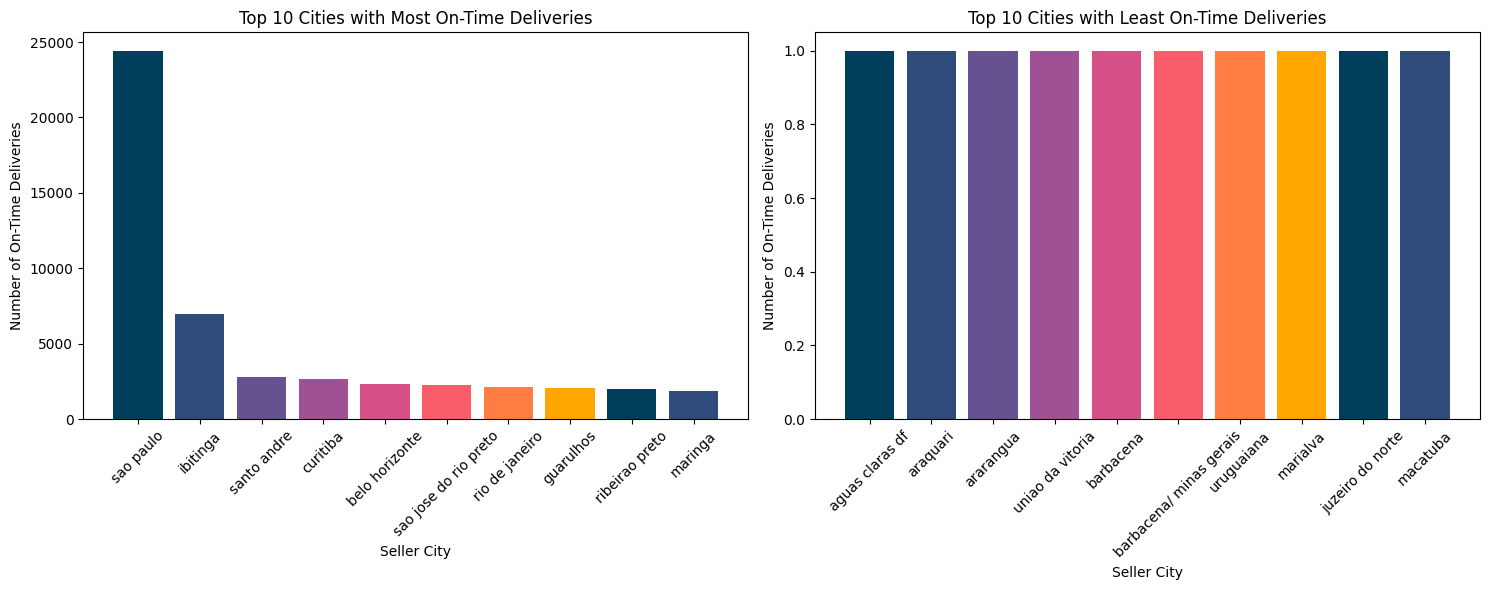

In [ ]:
colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Top 10 cities with the highest number of on-time deliveries
top_10_ontime = satisfaction_df[satisfaction_df['delivery_status'] == 'On Time'].groupby('seller_city')['delivery_status'].count().sort_values(ascending=False).head(10)

# Top 10 cities with the lowest number of on-time deliveries
bottom_10_ontime = satisfaction_df[satisfaction_df['delivery_status'] == 'On Time'].groupby('seller_city')['delivery_status'].count().sort_values(ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot top 10 cities
axes[0].bar(top_10_ontime.index, top_10_ontime.values, color=colors)
axes[0].set_title('Top 10 Cities with Most On-Time Deliveries')
axes[0].set_xlabel('Seller City')
axes[0].set_ylabel('Number of On-Time Deliveries')
axes[0].tick_params(axis='x', rotation=45)

# Plot bottom 10 cities
axes[1].bar(bottom_10_ontime.index, bottom_10_ontime.values, color=colors)
axes[1].set_title('Top 10 Cities with Least On-Time Deliveries')
axes[1].set_xlabel('Seller City')
axes[1].set_ylabel('Number of On-Time Deliveries')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


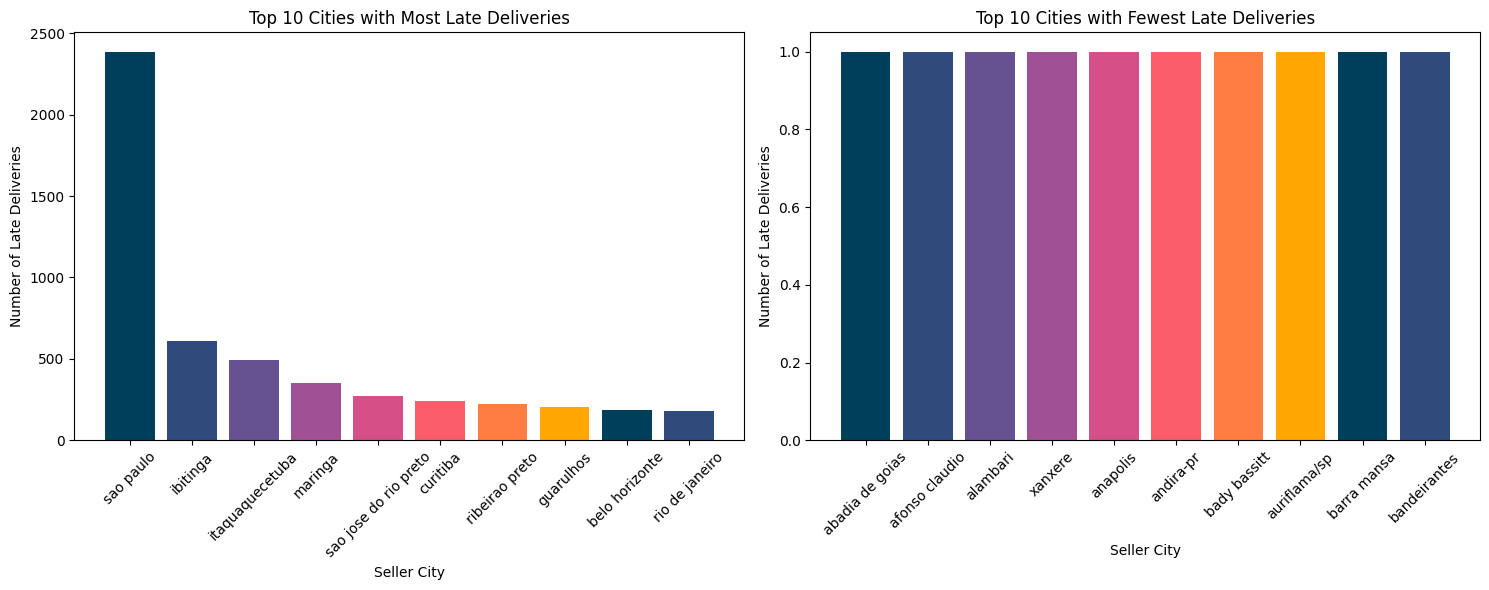

In [ ]:
# Calculate the top 10 cities with the most 'Late' deliveries
top_10_late_deliveries = satisfaction_df[satisfaction_df['delivery_status'] == 'Late'].groupby('seller_city')['delivery_status'].count().sort_values(ascending=False).head(10)

# Calculate the top 10 cities with the fewest 'Late' deliveries
bottom_10_late_deliveries = satisfaction_df[satisfaction_df['delivery_status'] == 'Late'].groupby('seller_city')['delivery_status'].count().sort_values(ascending=True).head(10)

colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot top 10 cities with most late deliveries
axes[0].bar(top_10_late_deliveries.index, top_10_late_deliveries.values, color=colors)
axes[0].set_title('Top 10 Cities with Most Late Deliveries')
axes[0].set_xlabel('Seller City')
axes[0].set_ylabel('Number of Late Deliveries')
axes[0].tick_params(axis='x', rotation=45)


# Plot top 10 cities with fewest late deliveries
axes[1].bar(bottom_10_late_deliveries.index, bottom_10_late_deliveries.values, color=colors)
axes[1].set_title('Top 10 Cities with Fewest Late Deliveries')
axes[1].set_xlabel('Seller City')
axes[1].set_ylabel('Number of Late Deliveries')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-97-5226e6e0dd03>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-5226e6e0dd03>:17: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-97-5226e6e0dd03>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-97-5226e6e0dd03>:23: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.



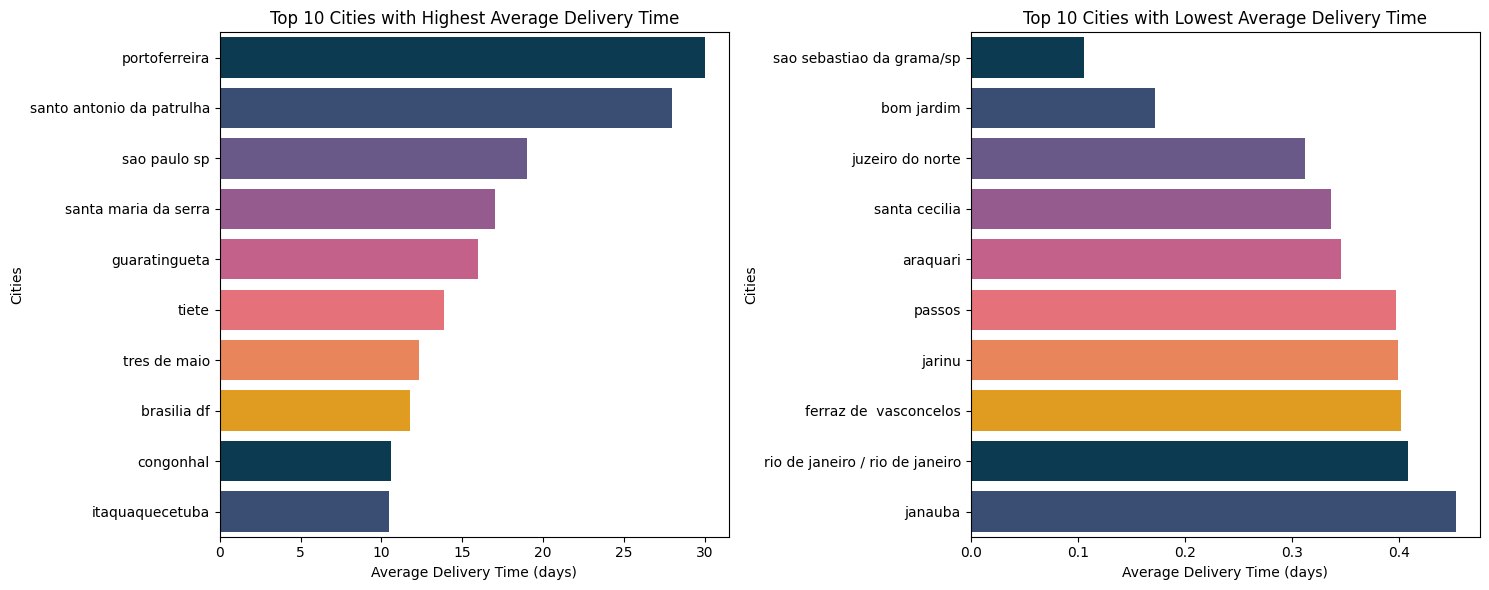

In [ ]:
# Calculate the average delivery time for each city
average_delivery_time_by_city = satisfaction_df.groupby('seller_city')['time_deliver_tocarrier'].mean()

# Get the top 10 cities with the highest average delivery times
top_10_highest_delivery_time = average_delivery_time_by_city.sort_values(ascending=False).head(10)

# Get the top 10 cities with the lowest average delivery times
top_10_lowest_delivery_time = average_delivery_time_by_city.sort_values(ascending=True).head(10)


colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the highest delivery times
sns.barplot(x=top_10_highest_delivery_time.values, y=top_10_highest_delivery_time.index, orient="h", palette=colors, ax=axes[0])
axes[0].set_xlabel("Average Delivery Time (days)")
axes[0].set_ylabel("Cities")
axes[0].set_title("Top 10 Cities with Highest Average Delivery Time")

# Plot the lowest delivery times
sns.barplot(x=top_10_lowest_delivery_time.values, y=top_10_lowest_delivery_time.index, orient="h", palette=colors, ax=axes[1])
axes[1].set_xlabel("Average Delivery Time (days)")
axes[1].set_ylabel("Cities")
axes[1].set_title("Top 10 Cities with Lowest Average Delivery Time")

plt.tight_layout()
plt.show()


<ipython-input-99-779763db6518>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-99-779763db6518>:15: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-99-779763db6518>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-99-779763db6518>:21: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.



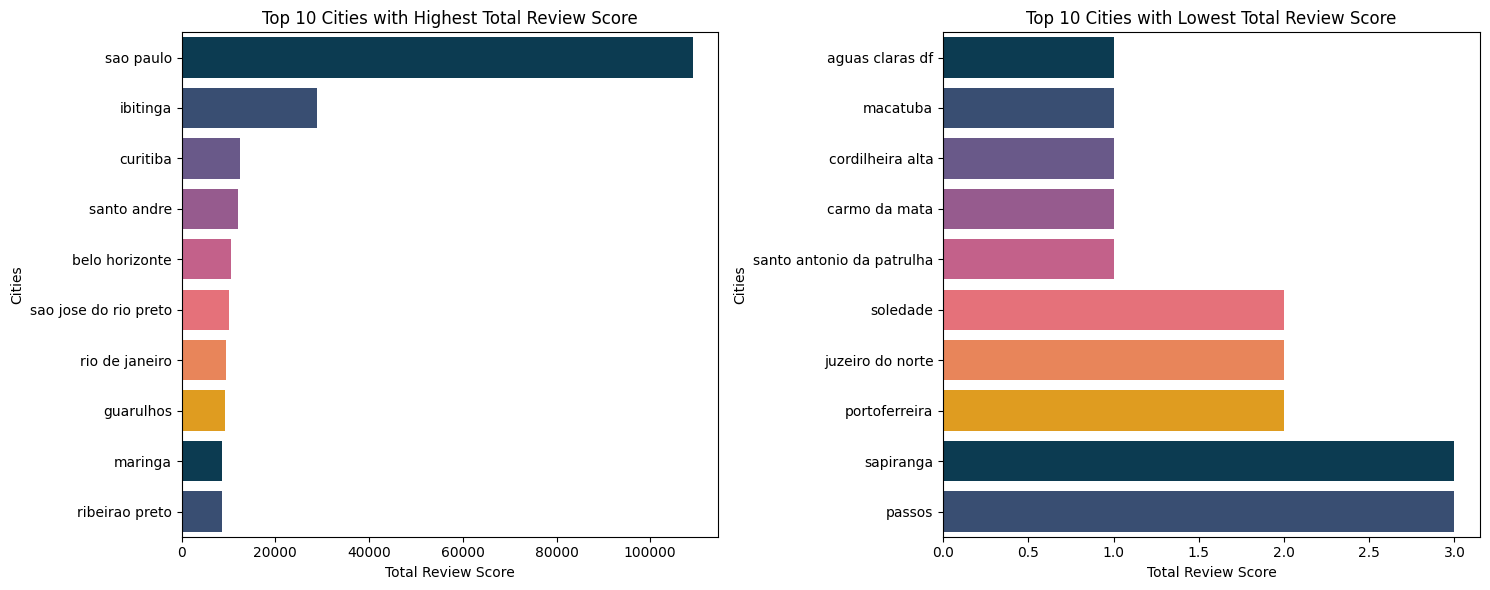

In [ ]:
city_review_sum = satisfaction_df.groupby('seller_city')['review_score'].sum()

# Get the top 10 cities with the highest total review scores
top_10_cities = city_review_sum.sort_values(ascending=False).head(10)

# Get the top 10 cities with the lowest total review scores
bottom_10_cities = city_review_sum.sort_values(ascending=True).head(10)

colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the highest review score sums
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, orient="h", palette=colors, ax=axes[0])
axes[0].set_xlabel("Total Review Score")
axes[0].set_ylabel("Cities")
axes[0].set_title("Top 10 Cities with Highest Total Review Score")

# Plot the lowest review score sums
sns.barplot(x=bottom_10_cities.values, y=bottom_10_cities.index, orient="h", palette=colors, ax=axes[1])
axes[1].set_xlabel("Total Review Score")
axes[1].set_ylabel("Cities")
axes[1].set_title("Top 10 Cities with Lowest Total Review Score")

plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana distribusi kota penjual (seller_city), Kota mana yang memiliki jumlah penjualan terbanyak dan terdikit?

<ipython-input-100-7011d6816e03>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-100-7011d6816e03>:15: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-100-7011d6816e03>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-100-7011d6816e03>:23: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.



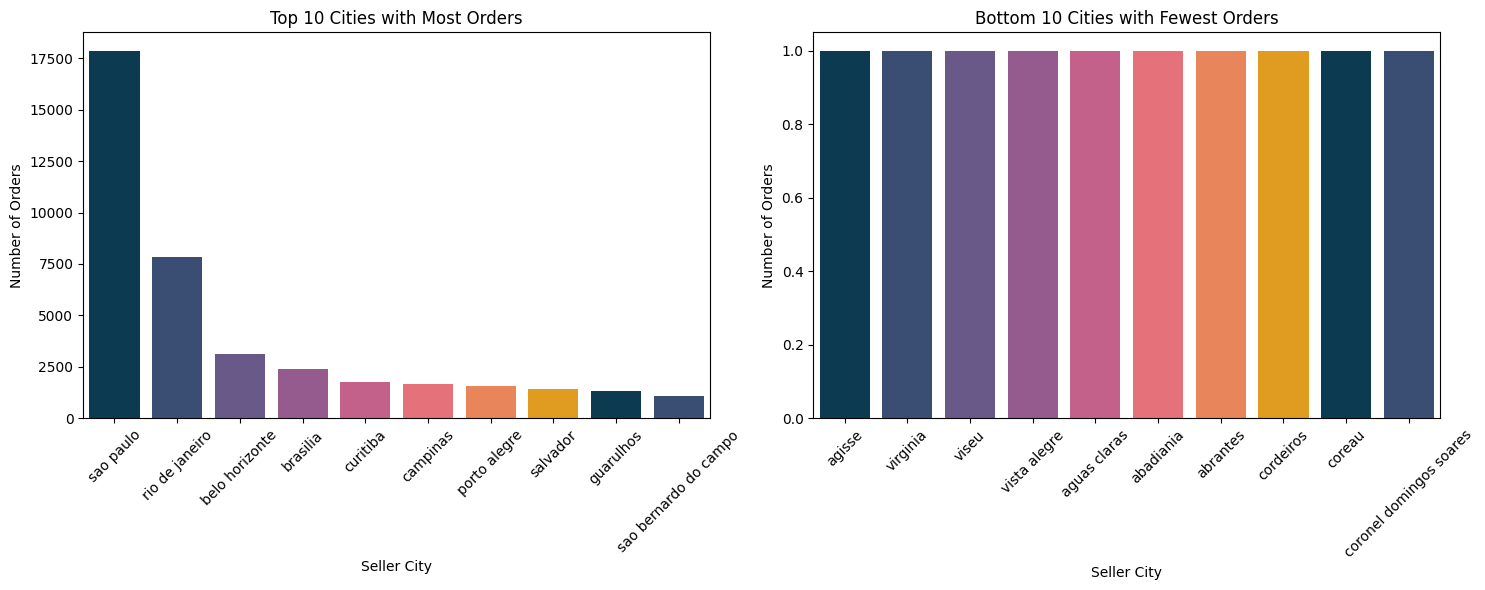

In [ ]:
seller_city_counts = ordered_df.groupby('customer_city')['order_item_id'].count()

# Get the top 10 cities with the most orders
top_10_cities = seller_city_counts.sort_values(ascending=False).head(10)

# Get the bottom 10 cities with the fewest orders
bottom_10_cities = seller_city_counts.sort_values(ascending=True).head(10)

colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 cities
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette=colors, ax=axes[0])
axes[0].set_xlabel("Seller City")
axes[0].set_ylabel("Number of Orders")
axes[0].set_title("Top 10 Cities with Most Orders")
axes[0].tick_params(axis='x', rotation=45)


# Plot the bottom 10 cities
sns.barplot(x=bottom_10_cities.index, y=bottom_10_cities.values, palette=colors, ax=axes[1])
axes[1].set_xlabel("Seller City")
axes[1].set_ylabel("Number of Orders")
axes[1].set_title("Bottom 10 Cities with Fewest Orders")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


### Pertanyaan 3: Apa saja produk/barang yang memiliki penjualan tertinggi dan terendah?

<ipython-input-101-d93841018f3b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-101-d93841018f3b>:12: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-101-d93841018f3b>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-101-d93841018f3b>:19: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.



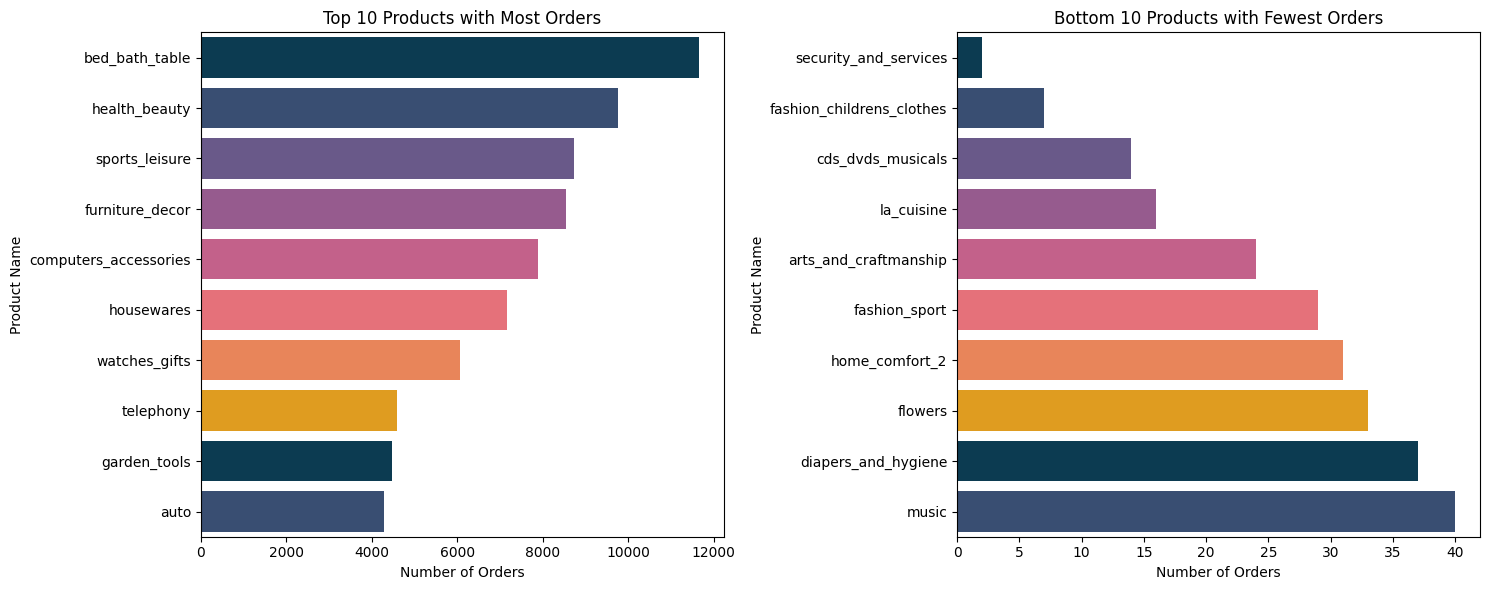

In [ ]:

top_10_products = ordered_df.groupby('name_product')['order_item_id'].count().sort_values(ascending=False).head(10)

# Calculate the bottom 10 products with the lowest sales volume
bottom_10_products = ordered_df.groupby('name_product')['order_item_id'].count().sort_values(ascending=True).head(10)

colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 products
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette=colors, ax=axes[0])
axes[0].set_xlabel("Number of Orders")
axes[0].set_ylabel("Product Name")
axes[0].set_title("Top 10 Products with Most Orders")


# Plot the bottom 10 products
sns.barplot(x=bottom_10_products.values, y=bottom_10_products.index, palette=colors, ax=axes[1])
axes[1].set_xlabel("Number of Orders")
axes[1].set_ylabel("Product Name")
axes[1].set_title("Bottom 10 Products with Fewest Orders")

plt.tight_layout()
plt.show()


### Pertanyaan 4 : Bagaimana distribusi kota pelanggan (customer_city) dan negara bagian pelanggan (customer_state)? Wilayah mana yang memiliki jumlah pelanggan terbanyak?

<ipython-input-102-bd7794fc57dd>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-102-bd7794fc57dd>:16: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-102-bd7794fc57dd>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-102-bd7794fc57dd>:22: UserWarning:


The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.



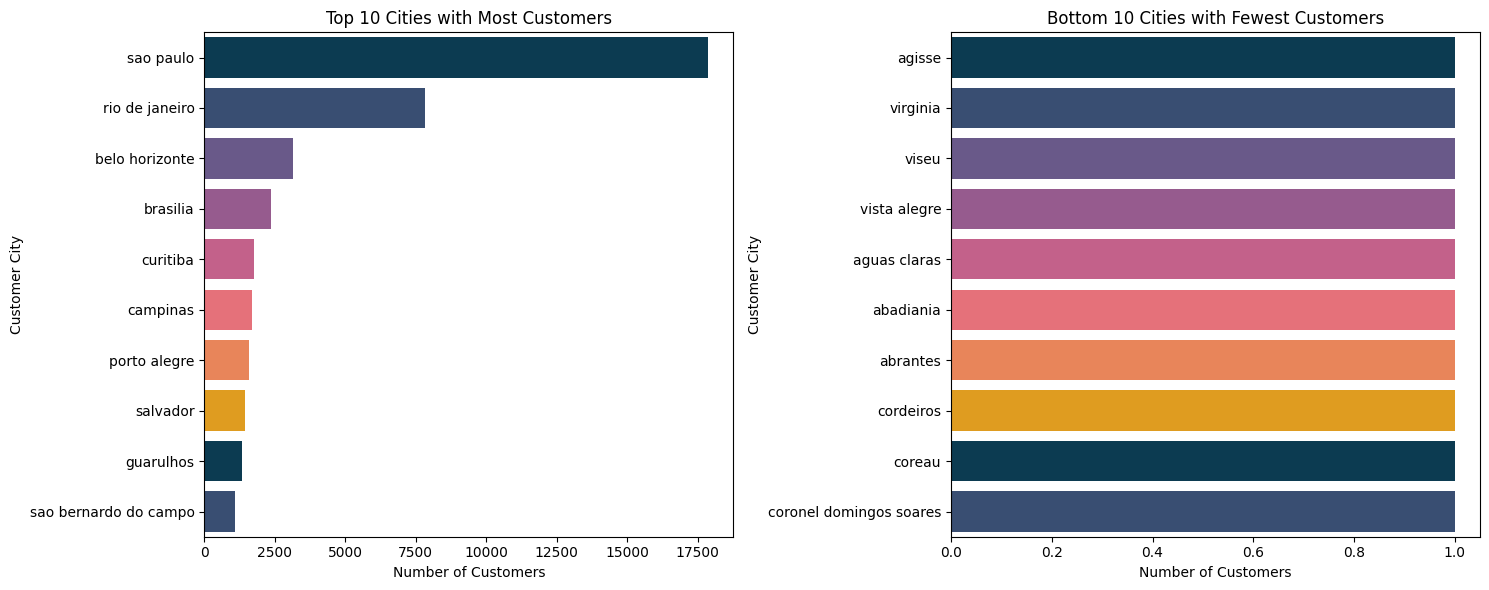

The state with the most customers is SP with 47819 customers.


In [ ]:
# Calculate the number of customers in each city
customer_city_counts = ordered_df.groupby('customer_city')['customer_id'].count()

# Get the top 10 cities with the most customers
top_10_customer_cities = customer_city_counts.sort_values(ascending=False).head(10)

# Get the bottom 10 cities with the fewest customers
bottom_10_customer_cities = customer_city_counts.sort_values(ascending=True).head(10)

colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the top 10 customer cities
sns.barplot(x=top_10_customer_cities.values, y=top_10_customer_cities.index, palette=colors, ax=axes[0])
axes[0].set_xlabel("Number of Customers")
axes[0].set_ylabel("Customer City")
axes[0].set_title("Top 10 Cities with Most Customers")

# Plot the bottom 10 customer cities
sns.barplot(x=bottom_10_customer_cities.values, y=bottom_10_customer_cities.index, palette=colors, ax=axes[1])
axes[1].set_xlabel("Number of Customers")
axes[1].set_ylabel("Customer City")
axes[1].set_title("Bottom 10 Cities with Fewest Customers")

plt.tight_layout()
plt.show()


# Calculate the number of customers in each state
customer_state_counts = ordered_df.groupby('customer_state')['customer_id'].count()

# Get the state with the most customers
top_customer_state = customer_state_counts.idxmax()
top_customer_count = customer_state_counts.max()

print(f"The state with the most customers is {top_customer_state} with {top_customer_count} customers.")


<ipython-input-103-b93556f6729a>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-103-b93556f6729a>:13: UserWarning:


The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.



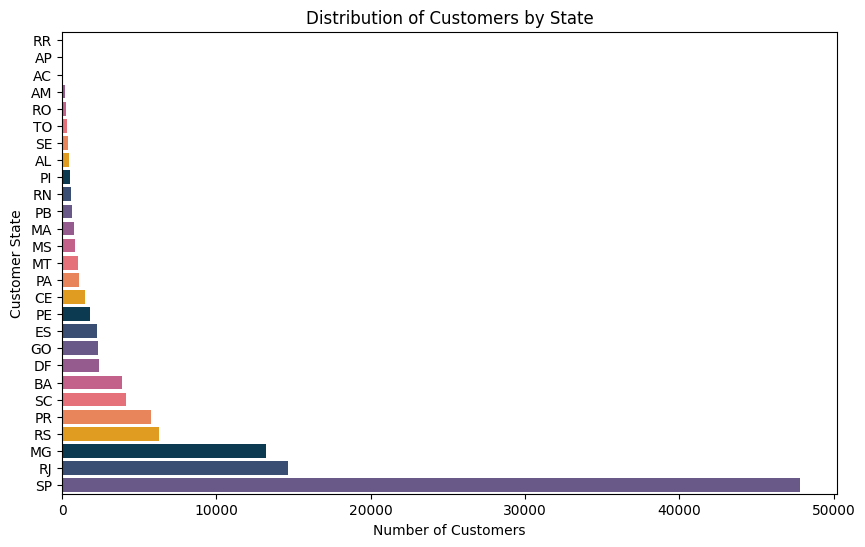

The state with the most customers is SP with 47819 customers.
The state with the least customers is RR with 44 customers.


In [ ]:
# Calculate the number of customers in each state
customer_state_counts = ordered_df.groupby('customer_state')['customer_id'].count().sort_values(ascending=True)

# Get the state with the most and least customers
top_customer_state = customer_state_counts.idxmax()
top_customer_count = customer_state_counts.max()
bottom_customer_state = customer_state_counts.idxmin()
bottom_customer_count = customer_state_counts.min()

# Plotting
colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_state_counts.values, y=customer_state_counts.index, palette=colors)
plt.xlabel("Number of Customers")
plt.ylabel("Customer State")
plt.title("Distribution of Customers by State")

plt.show()

print(f"The state with the most customers is {top_customer_state} with {top_customer_count} customers.")
print(f"The state with the least customers is {bottom_customer_state} with {bottom_customer_count} customers.")


## Analisis Lanjutan (Opsional)

### RFM Analysis

<ipython-input-118-910b0110fb89>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-118-910b0110fb89>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-118-910b0110fb89>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




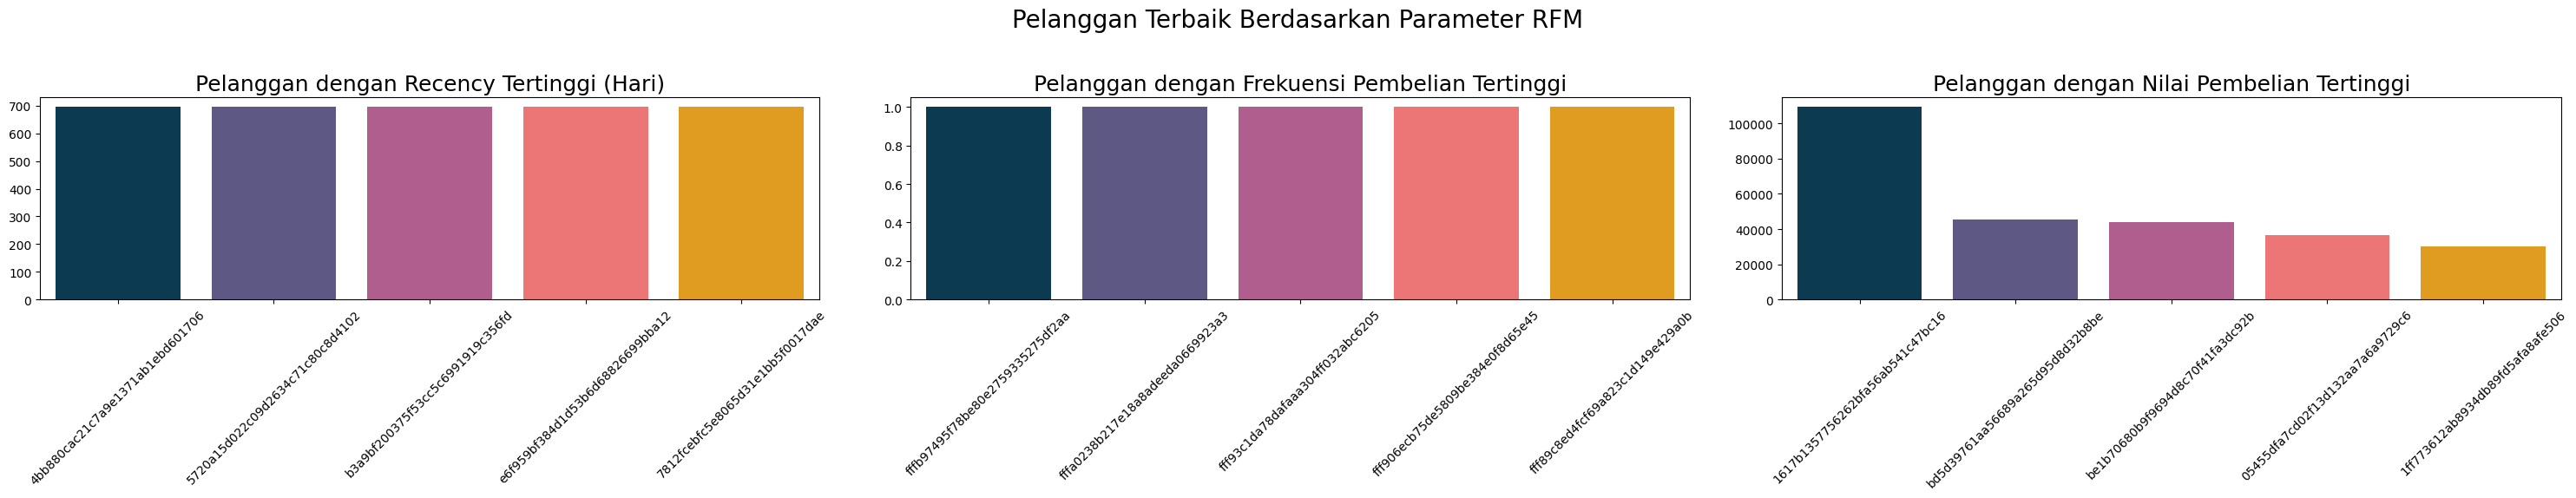

In [ ]:
ordered_df['order_approved_at'] = pd.to_datetime(ordered_df['order_approved_at'])

# Tentukan tanggal snapshot (tanggal terakhir dalam data + 1 hari)
snapshot_date = ordered_df['order_approved_at'].max() + pd.DateOffset(days=1)

# Hitung Recency, Frequency, dan Monetary Value
rfm_df = ordered_df.groupby('customer_id').agg(
    recency=('order_approved_at', lambda x: (snapshot_date - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('payment_value', 'sum')
)

# Reset index agar customer_id menjadi kolom kembali
rfm_df = rfm_df.reset_index()

# Visualisasi (seperti pada contoh sebelumnya)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#003f5c","#58508d", "#bc5090", "#ff6361", "#ffa600"]


sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pelanggan dengan Recency Tertinggi (Hari)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10, rotation=45) # Rotasi 45 derajat dan ukuran label diperkecil

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Pelanggan dengan Frekuensi Pembelian Tertinggi", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=10, rotation=45) # Rotasi 45 derajat dan ukuran label diperkecil

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Pelanggan dengan Nilai Pembelian Tertinggi", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=10, rotation=45) # Rotasi 45 derajat dan ukuran label diperkecil

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Untuk menyesuaikan layout agar tidak bertabrakan
plt.show()


### Geospatial Analysis

In [ ]:
customer_df2 = customer_df.copy()

In [ ]:
customer_df2 = customer_df2.rename(columns={"customer_zip_code_prefix": "geolocation_zip_code_prefix"})


In [ ]:
result_df = customer_df2.copy()

# Create a dictionary mapping zip code prefixes to their lat/lng coordinates
geo_dict = geo_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].drop_duplicates('geolocation_zip_code_prefix').set_index('geolocation_zip_code_prefix').to_dict('index')

# Add new columns to result_df
result_df['geolocation_lat'] = None
result_df['geolocation_lng'] = None

# Fill in lat/lng values for matching zip code prefixes
for idx, row in result_df.iterrows():
    zip_prefix = row['geolocation_zip_code_prefix']
    if zip_prefix in geo_dict:
        result_df.at[idx, 'geolocation_lat'] = geo_dict[zip_prefix]['geolocation_lat']
        result_df.at[idx, 'geolocation_lng'] = geo_dict[zip_prefix]['geolocation_lng']

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   customer_id                  99441 non-null  object
 1   customer_unique_id           99441 non-null  object
 2   geolocation_zip_code_prefix  99441 non-null  int64 
 3   customer_city                99441 non-null  object
 4   customer_state               99441 non-null  object
 5   geolocation_lat              99163 non-null  object
 6   geolocation_lng              99163 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
result_df

,customer_id,customer_unique_id,geolocation_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.66031
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.49693,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.50183
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614


In [ ]:
# Buat salinan untuk menghindari modifikasi dataframe asli
geo_result_df = result_df.copy()

# Drop rows with missing latitude or longitude values before creating Point objects
geo_result_df = geo_result_df.dropna(subset=['geolocation_lat', 'geolocation_lng'])

In [ ]:
result_df = geo_result_df

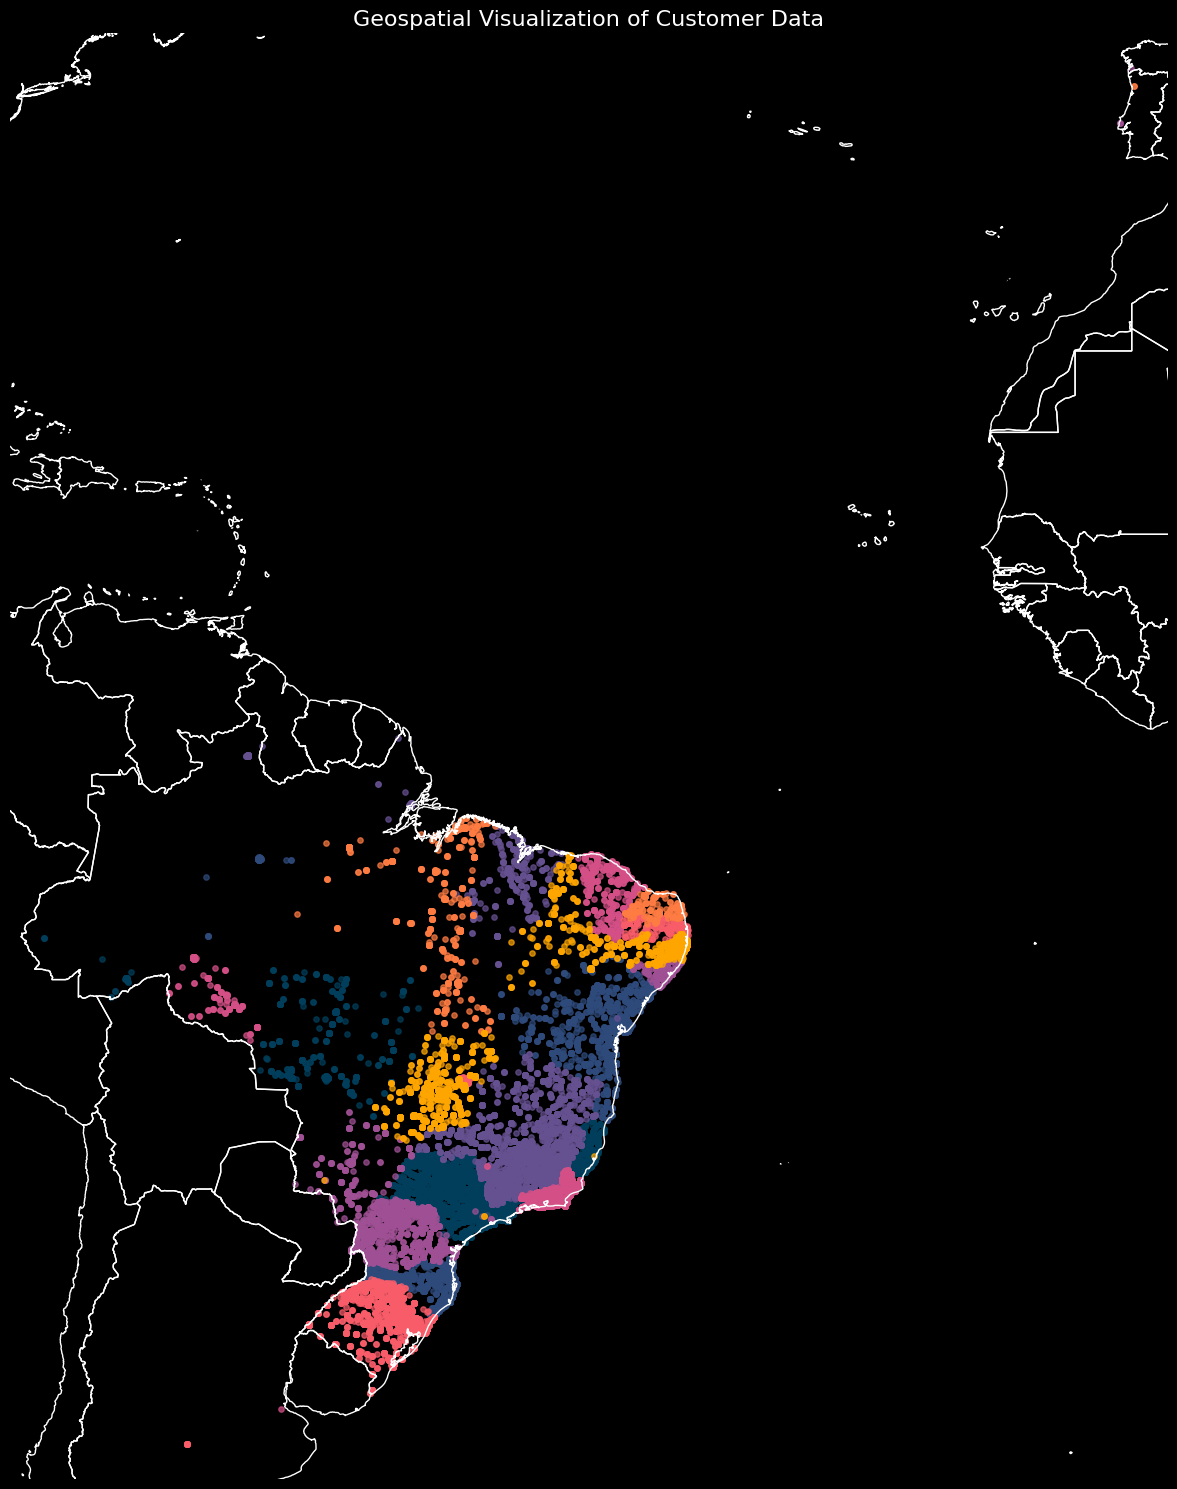

<Figure size 640x480 with 0 Axes>

In [ ]:
geo_result_df = result_df.copy()

# Konversi ke GeoDataFrame
geometry = [Point(xy) for xy in zip(geo_result_df['geolocation_lng'], geo_result_df['geolocation_lat'])]
geo_result_df = gpd.GeoDataFrame(geo_result_df, geometry=geometry, crs="EPSG:4326")

# Download peta Brasil menggunakan dataset built-in dari GeoPandas
try:
    # Menggunakan dataset dari Natural Earth yang disediakan oleh GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    brazil = world[world['name'] == 'Brazil']
except:
    # Alternatif jika metode di atas gagal
    try:
        brazil_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
        brazil = gpd.read_file(brazil_url)
    except:
        # Jika kedua metode gagal, kita buat bounding box Brazil
        print("Tidak dapat mengunduh peta Brazil, menggunakan bounding box.")
        # Bounding box untuk Brazil (sekitar)
        xmin, ymin, xmax, ymax = -73.9922, -33.7683, -34.7299, 5.2713
        from shapely.geometry import box
        brazil = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs="EPSG:4326")

# Tetapkan daftar warna sesuai dengan yang disediakan
colors = [
    '#003f5c', '#2f4b7c', '#665191', '#a05195',
    '#d45087', '#f95d6a', '#ff7c43', '#ffa600'
]

# Buat kategori untuk warna
# Menggunakan customer_state untuk pengelompokan
geo_result_df['color_group'] = pd.factorize(geo_result_df['customer_state'])[0] % 8
color_mapping = {i: colors[i] for i in range(8)}

# Siapkan plot
fig, ax = plt.subplots(1, 1, figsize=(12, 15))

# Plot outline peta Brasil dengan warna putih
brazil.boundary.plot(ax=ax, linewidth=1, color='white')

# Plot titik-titik data dengan warna berdasarkan grup
for i, color in color_mapping.items():
    subset = geo_result_df[geo_result_df['color_group'] == i]
    if not subset.empty:
        subset.plot(ax=ax, color=color, markersize=15, alpha=0.7)

# Ubah latar belakang menjadi hitam seperti pada gambar Anda
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Hapus sumbu dan ticks
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Fokus ke area persebaran data
# Ambil batas dari data point untuk fokus pada data, bukan seluruh Brazil
min_x, min_y, max_x, max_y = geo_result_df.total_bounds
# Tambahkan padding
padding = 2
ax.set_xlim([min_x-padding, max_x+padding])
ax.set_ylim([min_y-padding, max_y+padding])

# Tambahkan judul
plt.title('Geospatial Visualization of Customer Data', color='white', fontsize=16)

# Perbaiki tata letak dan tampilkan
plt.tight_layout()
plt.show()

# Jika Anda ingin menyimpan hasilnya
plt.savefig('geospatial_visualization_with_outline.png', facecolor='black', bbox_inches='tight', dpi=300)

### Clustering (Tanpa Machine Learning)

Value Clusters:
value_cluster
Budget     73787
Premium    39576
Name: count, dtype: int64

Product Clusters:
product_cluster
Personal/Leisure Items    92685
Home/Office Items         20682
Name: count, dtype: int64


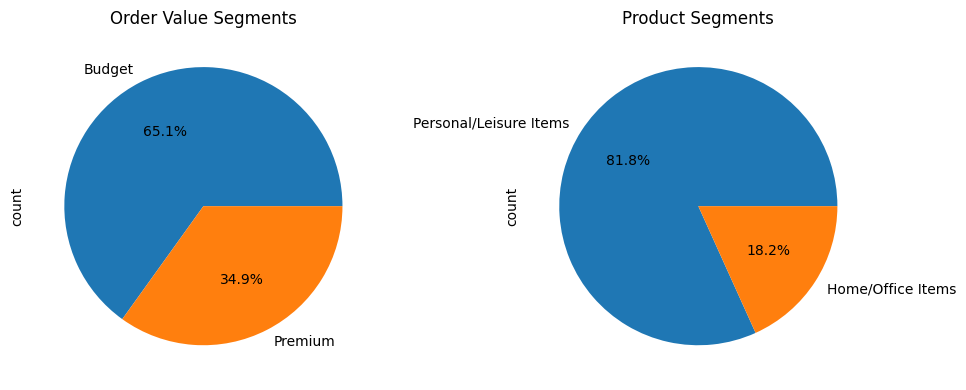


Order Segments Cross-tabulation:


product_cluster,Home/Office Items,Personal/Leisure Items
value_cluster,,
Budget,12435,61352
Premium,8247,31329


In [ ]:
def simple_cluster_orders(df):
    # Make a copy to avoid modifying the original dataframe
    df_clustered = df.copy()

    # Create just 2 payment value clusters
    df_clustered['value_cluster'] = pd.cut(
        df_clustered['payment_value'],
        bins=[0, 150, float('inf')],
        labels=['Budget', 'Premium']
    )

    # Create simplified product category (just 2 categories)
    def simple_categorize_product(product_name):
        if 'furniture' in product_name or 'house' in product_name or 'home' in product_name:
            return 'Home/Office Items'
        else:
            return 'Personal/Leisure Items'

    df_clustered['product_cluster'] = df_clustered['name_product'].apply(simple_categorize_product)

    return df_clustered


# Apply simplified clustering to both dataframes
ordered_df_simple = simple_cluster_orders(ordered_df)

# Display the distribution of clusters in ordered_df
print("Value Clusters:")
print(ordered_df_simple['value_cluster'].value_counts())
print("\nProduct Clusters:")
print(ordered_df_simple['product_cluster'].value_counts())


# Simple visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ordered_df_simple['value_cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Order Value Segments')

plt.subplot(1, 2, 2)
ordered_df_simple['product_cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Segments')
plt.tight_layout()
plt.show()

# Cross-tabulations for both dataframes
print("\nOrder Segments Cross-tabulation:")
pd.crosstab(ordered_df_simple['value_cluster'], ordered_df_simple['product_cluster'])


In [ ]:
ordered_df_simple.head(5)

,customer_id,customer_city,customer_state,order_id,order_approved_at,seller_city,payment_sequential,payment_type,payment_installments,payment_value,name_product,order_item_id,price,freight_value,value_cluster,product_cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,itaquaquecetuba,1,credit_card,2,146.87,office_furniture,1,124.99,21.88,Budget,Home/Office Items
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,itajai,1,credit_card,8,335.48,housewares,1,289.00,46.48,Premium,Home/Office Items
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,itaquaquecetuba,1,credit_card,7,157.73,office_furniture,1,139.94,17.79,Premium,Home/Office Items
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,itaquaquecetuba,1,credit_card,1,173.30,office_furniture,1,149.94,23.36,Premium,Home/Office Items
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,ibitinga,1,credit_card,8,252.25,home_confort,1,230.00,22.25,Premium,Home/Office Items




Satisfaction Clusters:
satisfaction_cluster
Satisfied              83224
Unsatisfied/Neutral    25236
Name: count, dtype: int64

Satisfaction Segments Cross-tabulation:


col_0
satisfaction_cluster


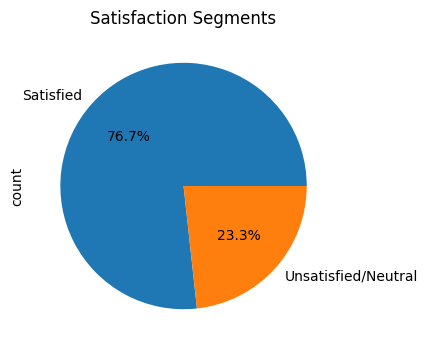

In [ ]:
def simple_cluster_satisfaction(df):
    # Make a copy to avoid modifying the original dataframe
    df_clustered = df.copy()

    # Create just 2 review clusters
    df_clustered['satisfaction_cluster'] = pd.cut(
        df_clustered['review_score'],
        bins=[0, 3, 5],
        labels=['Unsatisfied/Neutral', 'Satisfied']
    )


    return df_clustered

satisfaction_df_simple = simple_cluster_satisfaction(satisfaction_df)

# Display the distribution of clusters in satisfaction_df
print("\n\nSatisfaction Clusters:")
print(satisfaction_df_simple['satisfaction_cluster'].value_counts())


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
satisfaction_df_simple['satisfaction_cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Satisfaction Segments')


print("\nSatisfaction Segments Cross-tabulation:")
pd.crosstab(index=satisfaction_df_simple['satisfaction_cluster'], columns=[None])  # Use [None] for a simple count


In [ ]:
satisfaction_df_simple.head(5)

,seller_city,review_score,order_status,delivery_status,time_deliver_tocarrier,satisfaction_cluster
0,campinas,5,delivered,Late,7.000000,Satisfied
1,campinas,1,delivered,Late,6.000000,Unsatisfied/Neutral
2,campinas,3,delivered,On Time,0.272211,Unsatisfied/Neutral
3,mogi guacu,5,delivered,On Time,0.649907,Satisfied
4,mogi guacu,5,delivered,On Time,2.000000,Satisfied


#### **Pengelompokan ini didasarkan pada nilai atau kategori tertentu dalam setiap dataframe**

- ordered_df:

  Produk dikelompokkan berdasarkan payment_value menjadi "Budget" (≤ 150) dan "Premium" (> 150). terdapat

  Produk juga dikelompokkan berdasarkan jenis/penggunaan menjadi "Home/Office Items" dan "Personal/Leisure Items" berdasarkan nama produk bernama furnitur.

  Data Hasil Clustering :
  1. Value Clusters:
  
    value_cluster
  
    Budget     73787
  
    Premium    39576

  2. Product Clusters:
  
    product_cluster
  
    Personal/Leisure Items    92685
  
    Home/Office Items         20682

- satisfaction_df:

  Pelanggan dikelompokkan berdasarkan skor kepuasan menjadi "Unsatisfied/Neutral" (skor 1-3) dan "Satisfied" (skor 4-5).

  Satisfaction Clusters:
  
  satisfaction_cluster
  
  1. Satisfied              83224
  
  2. Unsatisfied/Neutral    25236
  


## Conclusion

**Pertanyaan 1. Bagaimana hasil segmentasi kepuasan pelanggan berdasarkan ulasan terhadap e-commerce, khususnya dalam kaitannya dengan kota penjual dan rating tertinggi, waktu pemesanan, status pengiriman, serta rating terbanyak?**

1. Kota Penjual dengan Rating dan Kepuasan Tinggi
  Kota dengan pengiriman tepat waktu terbanyak:

  Sao Paulo (24.5K), Ibitinga (7K), Santo Andre (2.8K)

  Kota dengan pengiriman paling cepat:

  Sao Sebastiao da Grama/SP, Bom Jardim, Juazeiro do Norte (semua di bawah 0.4 hari)

  Kota dengan sedikit keterlambatan:

  Abadia de Goias, Afonso Claudio, Anapolis, dll (1 keterlambatan)

2. Kota Penjual dengan Rating dan Kepuasan Rendah
  Kota dengan keterlambatan terbanyak:

  Sao Paulo (2.4K), Ibitinga (620), Itaquaquecetuba (490)

  Kota dengan waktu pengiriman paling lama:

  Porto Ferreira (30 hari), Santo Antonio da Patrulha (27 hari), Sao Paulo SP (19 hari)

3. Status Pengiriman
  Kota dengan keterlambatan tinggi juga masuk daftar pengiriman tepat waktu → indikasi volume transaksi besar (cth: Sao Paulo).

  Kota dengan pengiriman tepat waktu dan cepat cenderung kecil dan jarang keterlambatan → lebih konsisten.



**Pertanyaan 2: Bagaimana distribusi kota penjual (seller_city), Kota mana yang memiliki jumlah penjualan terbanyak dan terdikit?**

1. Kota Penjual dengan Jumlah Penjualan Terbanyak
  Kota dengan jumlah order tertinggi:

  Sao Paulo (±18.000 pesanan)

  Rio de Janeiro (±8.000 pesanan)

  Belo Horizonte (±3.000 pesanan)

  Brasilia (±2.400 pesanan)

  Curitiba (±1.800 pesanan)

  Campinas, Porto Alegre, Salvador, Guarulhos, Sao Bernardo do Campo (semua di kisaran 1.200–1.600 pesanan)

2. Kota Penjual dengan Jumlah Penjualan Paling Sedikit
  Kota dengan hanya 1 pesanan:

  Agisse, Virginia, Viseu, Vista Alegre, Aguas Claras, Abadiania, Abrantes, Cordeiros, Coreau, Coronel Domingos Soares




**Pertanyaan 3: Apa saja produk/barang yang memiliki penjualan tertinggi dan terendah?**

1. Produk dengan Penjualan Tertinggi
Kategori dengan jumlah order terbanyak:

  bed_bath_table (±11.500 pesanan)

  health_beauty (±9.800 pesanan)

  sports_leisure (±8.600 pesanan)

  furniture_decor (±8.500 pesanan)

  computers_accessories (±7.800 pesanan)

  housewares (±7.300 pesanan)

  watches_gifts (±6.100 pesanan)

  telephony & garden_tools (±4.700 pesanan)

  auto (±4.500 pesanan)

2. Produk dengan Penjualan Terendah
Kategori dengan jumlah order paling sedikit:

  security_and_services (±2 pesanan)

  fashion_childrens_clothes (±7 pesanan)

  cds_dvds_musicals (±14 pesanan)

  la_cuisine (±16 pesanan)

  arts_and_craftsmanship (±24 pesanan)

  fashion_sport (±29 pesanan)

  home_comfort_2 (±31 pesanan)

  flowers (±34 pesanan)

  diapers_and_hygiene (±38 pesanan)

  music (±40 pesanan)

**Pertanyaan 4: Bagaimana distribusi kota pelanggan (customer_city) dan negara bagian pelanggan (customer_state)? Wilayah mana yang memiliki jumlah pelanggan terbanyak?**

1. Kota dengan Jumlah Pelanggan Terbanyak (Top 10):

  Sao Paulo (~17.000 pelanggan)

  Rio de Janeiro

  Belo Horizonte

2. Kota dengan Jumlah Pelanggan Paling Sedikit (Bottom 10):
  Semua kota ini memiliki hanya 1 pelanggan:

  Agisse, Virginia, Viseu, Vista Alegre, Aguas Claras, Abadiania, Abrantes, Cordeiros, Coreau, Coronel Domingos Soares

3. Distribusi Berdasarkan Negara Bagian (customer_state):

  SP (São Paulo) adalah negara bagian dengan jumlah pelanggan terbanyak (~48.000)

  Diikuti oleh RJ (Rio de Janeiro) dan MG (Minas Gerais)

  Negara bagian dengan jumlah pelanggan paling sedikit termasuk RR, AP, AC, AM, dan RO

## Download Dataset yang dipakai keperluan Streamlit

In [ ]:
ordered_df.to_csv('ordered_df.csv', index=False)
satisfaction_df.to_csv('satisfaction_df.csv', index=False)
geo_result_df.to_csv('geo_result_df.csv', index=False)
